<span style="font-size:large;">
<div style="text-align: right">IM-UH 1511 <b>Introduction to Digital Humanities</b><br/>
Student name: <span style="color:blue"><b>X XX</b></span><br/>
Grade: <span style="color:red"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 5b</span>
# <span style="color:green">Twitter Networks

In [1]:
import twitter, random, operator, os, math, re, string, copy, itertools, pickle, datetime, pandas as pd, numpy as np, matplotlib.pyplot as plt, networkx as nx
from collections import Counter, OrderedDict
import operator
from wordcloud import WordCloud
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
def weakly_connected_component_subgraphs(G):
    for c in nx.weakly_connected_components(G):
        yield G.subgraph(c)
        
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore')

In [2]:
search_term = "Louvre"
stc = search_term.replace(" ","")
plname = stc+"_df.pic" 
search_df = pd.read_pickle(plname)
search_df = search_df.sort_values(by='created')
search_df.head()

,screen_name,created,retweets,favorites,id,reply_screen_name,reply_id,source,lang,place,user_mentions,hashtags,text,is_retweet,retweeted_screen_name,retweeted_created,retweeted_source
2099,Yeezuss,2020-06-22 00:42:29,1,0,1274865307551698944,None,NaN,Twitter for iPhone,fr,None,nicolllettte; Yeezuss,None,@Yeezuss put it in the louvre,True,nicolllettte,Mon Jun 22 00:32:39 +0000 2020,Twitter for iPhone
2098,Pucci_en,2020-06-22 00:42:46,0,0,1274865379433566208,None,NaN,twittbot.net,en,None,None,None,Dio and I have the best sleepovers... Did you ...,False,False,False,False
2097,Fragren36,2020-06-22 00:43:29,64,0,1274865556915654660,None,NaN,Twitter for Android,fr,None,MilovanCavor,Rosa; Louvre,"Avez-vous déjà vu une anoxie ? Celle-ci, salle...",True,MilovanCavor,Fri Jun 19 14:17:15 +0000 2020,Twitter for iPhone
2096,regularhwang,2020-06-22 00:45:39,0,1,1274866103953563655,stigmataem,1.274864e+18,Twitter for iPhone,en,None,stigmataem,None,@stigmataem put these in the louvre,False,False,False,False
2095,esther_2U,2020-06-22 00:46:07,38,0,1274866221754662912,None,NaN,Twitter for iPhone,ko,None,mypreciousBogum,None,🖼🎨박보검 \n\n겨울에 올릴까 했던 거였는데 오늘🙂\n\n장소는 루브르미술관 Co...,True,mypreciousBogum,Sun Jun 21 13:09:57 +0000 2020,Twitter for iPhone


In [3]:
hashtags_list=[]
mentions_list=[]
for i in range(len(search_df)):
    h=search_df.iloc[i]['hashtags']
    if type(h)==str:
        h=h.replace("'","").split("; ")
        h=["#"+ht for ht in h]
    else:
        h=[]
    hashtags_list.append(h)
    me=search_df.iloc[i]['user_mentions']
    if type(me)==str:
        me=me.replace("'","").split("; ")
        me=["@"+men for men in me]
    else:
        me=[]
    mentions_list.append(me)
search_df['hashtags_list']=hashtags_list
search_df['mentions_list']=mentions_list
search_df['sender']=["@"+s for s in search_df["screen_name"].tolist()]
evd=search_df['created']
evd=pd.to_datetime(evd)
search_df['date']=evd
df=search_df[['date','sender','hashtags_list','mentions_list','lang','place']]
mind=df.date.min().strftime("%d-%m-%Y %H:%M:%S")
maxd=df.date.max().strftime("%d-%m-%Y %H:%M:%S")
print("The", search_term, "dataframe contains", len(df), "tweets", "from", mind, "to", maxd)
df.head(50)

The Louvre dataframe contains 2100 tweets from 22-06-2020 00:42:29 to 23-06-2020 05:21:11


,date,sender,hashtags_list,mentions_list,lang,place
2099,2020-06-22 00:42:29,@Yeezuss,[],"[@nicolllettte, @Yeezuss]",fr,None
2098,2020-06-22 00:42:46,@Pucci_en,[],[],en,None
2097,2020-06-22 00:43:29,@Fragren36,"[#Rosa, #Louvre]",[@MilovanCavor],fr,None
2096,2020-06-22 00:45:39,@regularhwang,[],[@stigmataem],en,None
2095,2020-06-22 00:46:07,@esther_2U,[],[@mypreciousBogum],ko,None
2094,2020-06-22 00:46:11,@kinglolux,[],[@jeezjon],en,None
2093,2020-06-22 00:46:26,@carol_a_priori,[],[@emzanotti],en,None
2092,2020-06-22 00:46:39,@jadsu69,[],[@TheLifeOfGaga],en,None
2091,2020-06-22 00:46:54,@sara_alem02,[],[@TheLifeOfGaga],en,None
2090,2020-06-22 00:47:10,@sunflxwer111,[],[@BTS_twt],en,None


### 1. Counting Tweets, Tweeple, Hashtags, Mentions, Languages and Places

In [4]:
def flis(list):
    return [i for sl in list for i in sl]

In [5]:
print(len(df), "tweets")  
senders=df["sender"].tolist()
usenders=set(senders)
print(len(usenders), "unique senders-tweeple")
hashtags=[df["hashtags_list"].tolist()[i] for i in range(len(df))]
hashtags=flis(hashtags)
uhashtags=set(hashtags)
print (len(uhashtags), "unique hashtags in tweets")
mentions=[df["mentions_list"].tolist()[i] for i in range(len(df))]
mentions=flis(mentions)
umentions=set(mentions)
print(len(umentions), "unique mentioned-tweeple in tweets")
languages=[df["lang"].tolist()[i] for i in range(len(df))]  
ulanguages=set(languages)
print(len(ulanguages), "unique languages in tweets")
places=[df["place"].tolist()[i] for i in range(len(df))]
places=[p for p in places if type(p)==str]
uplaces=set(places)
print(len(uplaces), "unique places in tweets")

2100 tweets
1870 unique senders-tweeple
350 unique hashtags in tweets
756 unique mentioned-tweeple in tweets
22 unique languages in tweets
9 unique places in tweets


In [6]:
dd={}
dd["all_tweets"]=[len(df),len(usenders),len(uhashtags),len(umentions),len(ulanguages),len(uplaces)] 
ddf = pd.DataFrame.from_dict(dd, orient='index').reset_index()
ddf.rename(columns={'index': 'all_tweets', 0: 'tweets',1:"senders",2:"hashtags",3:"mentions",5:"languages",6:"places"}, inplace=True) 
ddf

,all_tweets,tweets,senders,hashtags,mentions,4,languages
0,all_tweets,2100,1870,350,756,22,9


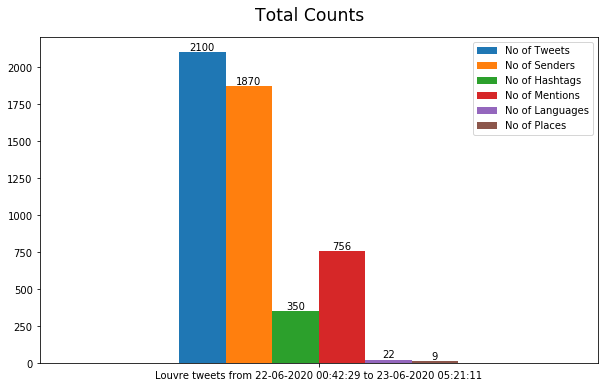

In [7]:
ax=ddf.plot.bar(figsize=(10,6),rot=0); 
ax.legend(["No of Tweets", "No of Senders","No of Hashtags","No of Mentions","No of Languages","No of Places"]); 
labels=[search_term+" tweets from "+mind+" to "+maxd] 
ax.set_xticklabels(labels, rotation=0);
for p in ax.patches:
    ax.annotate("%i" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.suptitle('Total Counts', x=0.5, y=0.95, ha='center', fontsize='xx-large');

In [8]:
tweeple=senders+mentions
for s in senders:
    tweeple.append(s)
x=Counter(tweeple)
x=x.most_common()
print(len(x),"unique tweeple")
x

2421 unique tweeple


[('@ParisAMDParis', 140),
 ('@la__louvre', 129),
 ('@TheLifeOfGaga', 116),
 ('@MuseeLouvre', 103),
 ('@Louvre_zigoeHi', 86),
 ('@ars_omnis', 81),
 ('@kidmingyu', 53),
 ('@FLAMAMILLONARIA', 39),
 ('@roscullell', 38),
 ('@Louvre_Ars', 34),
 ('@VICTSUBIN99', 28),
 ('@LordeBrasil', 26),
 ('@TiroDiCanto', 25),
 ('@MBenhalilem', 22),
 ('@seun8woo', 19),
 ('@EROS_lNC', 19),
 ('@ChCatalina1', 19),
 ('@PCentreEnCommun', 19),
 ('@parisvisites', 19),
 ('@ArielWeilT', 19),
 ('@Dadoudidonk', 18),
 ('@RealSardonicus', 17),
 ('@CABRAXAS10', 16),
 ('@clasicasIEDA', 15),
 ('@SantiagoArtis', 12),
 ('@louvrobot', 12),
 ('@maki_maki_3', 12),
 ('@ComteJeanine', 12),
 ('@ProyectoHistor2', 12),
 ('@PortalClasico', 11),
 ('@KSpartiatis', 11),
 ('@queenanneblythe', 11),
 ('@Zakinus', 10),
 ('@CosmoOAaaarty', 10),
 ('@Alabandine_', 10),
 ('@DominguezArjona', 10),
 ('@lellinara', 10),
 ('@dylan77380', 10),
 ('@mypreciousBogum', 10),
 ('@corgiaaron', 10),
 ('@louvreyazawa', 9),
 ('@meigalouvre', 9),
 ('@JanLefner

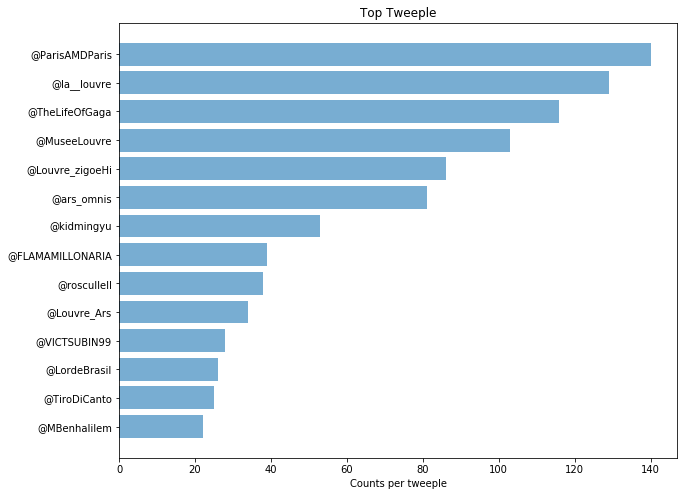

In [9]:
keys = [i for (i,j) in x if j>20] 
y_pos = np.arange(len(keys))
performance = [j for (i,j) in x if j>20] 
plt.figure(figsize=(10,8))
ax = plt.axes()
plt.barh(y_pos, performance, align='center', alpha=0.6) 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Counts per tweeple')
plt.title('Top Tweeple')
plt.show()

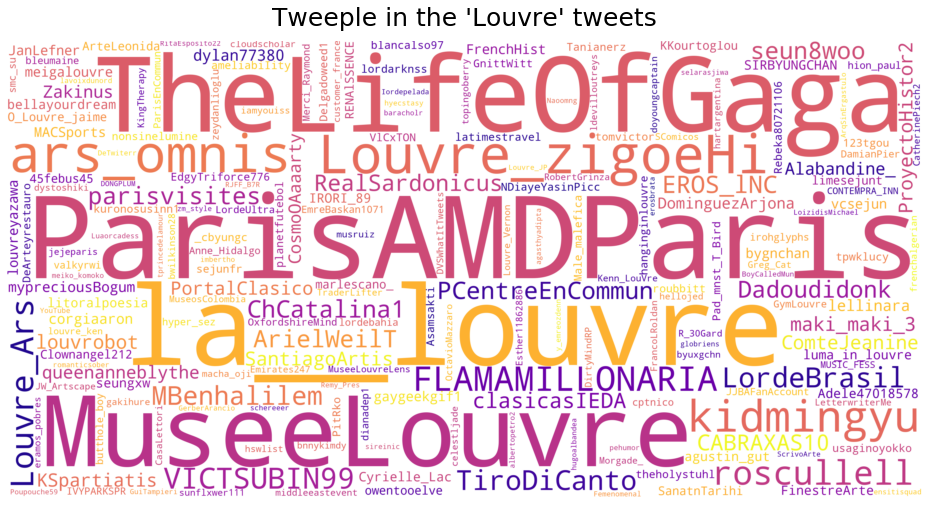

In [10]:
t=[]
for (i,j) in x:
    for k in range(j):
#         print(i.replace(" ","_").replace("-","_"))
        t.append(i.replace(" ","_").replace("-","_"))
ttd=' '.join(t)
wordcloud = WordCloud(collocations=False,background_color="white",colormap="plasma",width=4000,height=2000).generate(ttd)
fig = plt.figure(figsize=(13,13))
default_colors = wordcloud.to_array()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
ss="Tweeple in the '%s' tweets" %search_term
plt.suptitle(ss,fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 1.4]) 
plt.show()

In [11]:
y=Counter(hashtags)
y=y.most_common()
print(len(y),"unique hashtags")
y

350 unique hashtags


[('#Louvre', 67),
 ('#UnJourUneOeuvre', 59),
 ('#Paris', 56),
 ('#ArtGrec', 52),
 ('#민규', 52),
 ('#racismo', 36),
 ('#cultura', 36),
 ('#Europa', 36),
 ('#EEUU', 36),
 ('#louvre', 31),
 ('#art', 29),
 ('#WorkOfTheDay', 22),
 ('#tourisme', 21),
 ('#photography', 20),
 ('#culture', 19),
 ('#patrimoine', 18),
 ('#vintage', 17),
 ('#paris', 15),
 ('#France', 14),
 ('#ieda', 14),
 ('#GreekArt', 12),
 ('#Sculptures', 11),
 ('#Roman', 10),
 ('#Greek', 10),
 ('#mythology', 10),
 ('#Greece', 10),
 ('#Museum', 10),
 ('#FrayJuniperoSerra', 9),
 ('#Murillo', 9),
 ('#Sevilla', 9),
 ('#antinous', 8),
 ('#MACtion', 8),
 ('#GoRockets', 8),
 ('#travel', 7),
 ('#france', 6),
 ('#artist', 6),
 ('#artexhibition', 5),
 ('#Artshopping', 5),
 ('#Carrusel', 5),
 ('#MonaYoussef', 5),
 ('#Gallery', 5),
 ('#artists', 5),
 ('#masterpieces', 5),
 ('#artnews', 5),
 ('#AbuDhabi', 5),
 ('#UAE', 5),
 ('#PaesaggiInteriori', 5),
 ('#FridayThoughts', 4),
 ('#artwork', 4),
 ('#contemporaryart', 4),
 ('#wellbeing', 4),
 ('

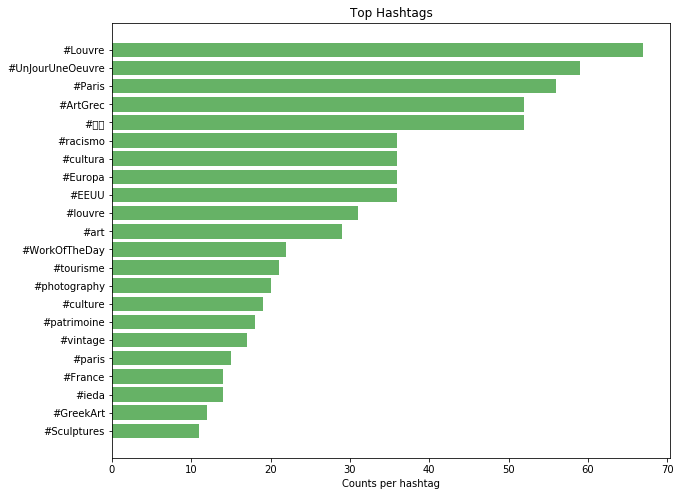

In [12]:
keys = [i for (i,j) in y if j>10] 
y_pos = np.arange(len(keys))
performance = [j for (i,j) in y if j>10] 
plt.figure(figsize=(10,8))
ax = plt.axes()
plt.barh(y_pos, performance, align='center',color='green', alpha=0.6) 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Counts per hashtag')
plt.title('Top Hashtags')
plt.show()

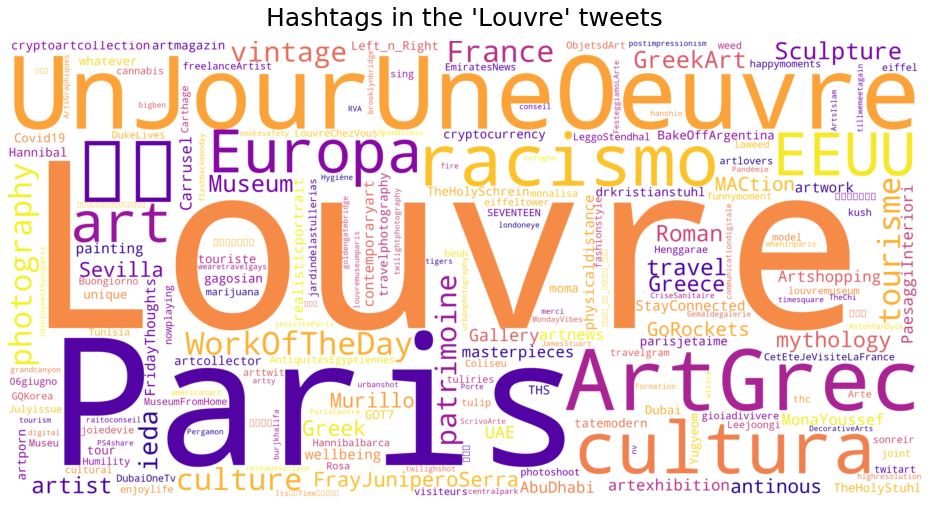

In [13]:
t=[]
for (i,j) in y:
    for k in range(j):
#         print(i.replace(" ","_").replace("-","_"))
        t.append(i.replace(" ","_").replace("-","_"))
ttd=' '.join(t)
wordcloud = WordCloud(collocations=False,background_color="white",colormap="plasma",width=4000,height=2000).generate(ttd)
fig = plt.figure(figsize=(13,13))
default_colors = wordcloud.to_array()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
ss="Hashtags in the '%s' tweets" %search_term
plt.suptitle(ss,fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 1.4]) 
plt.show()

In [14]:
z=Counter(languages)
z=z.most_common()
print(len(z),"unique languages")
z

22 unique languages


[('en', 758),
 ('fr', 570),
 ('es', 295),
 ('pt', 152),
 ('ja', 93),
 ('tr', 41),
 ('ko', 38),
 ('in', 36),
 ('it', 28),
 ('ht', 26),
 ('und', 25),
 ('cs', 8),
 ('ca', 7),
 ('de', 7),
 ('ro', 6),
 ('nl', 3),
 ('da', 2),
 ('fi', 1),
 ('cy', 1),
 ('tl', 1),
 ('th', 1),
 ('ar', 1)]

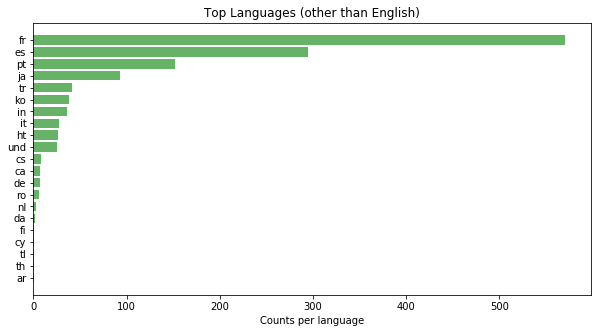

In [15]:
keys = [i for (i,j) in z if i!="en"] 
y_pos = np.arange(len(keys))
performance = [j for (i,j) in z if i!="en"] 
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.barh(y_pos, performance, align='center',color='green', alpha=0.6) 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Counts per language')
plt.title('Top Languages (other than English)')
plt.show()

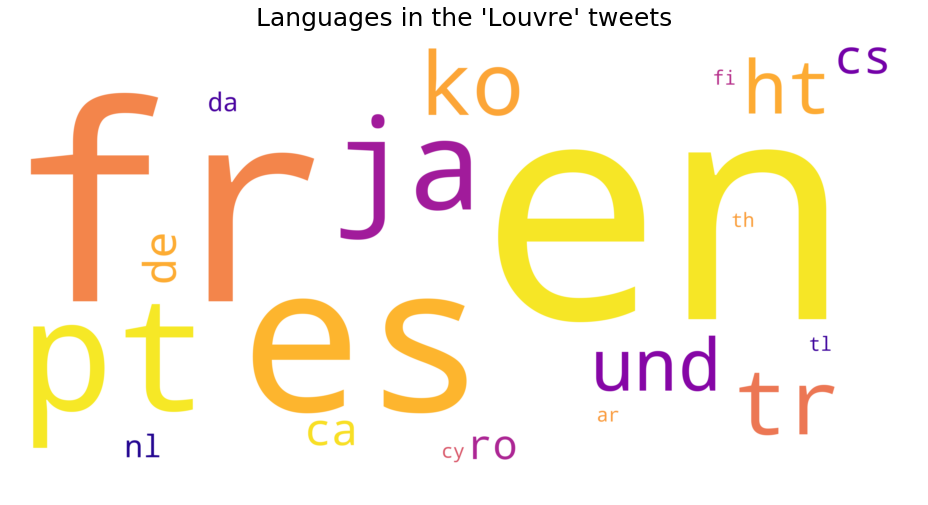

In [16]:
t=[]
for (i,j) in z:
    for k in range(j):
#         print(i.replace(" ","_").replace("-","_"))
        t.append(i.replace(" ","_").replace("-","_"))
ttd=' '.join(t)
wordcloud = WordCloud(collocations=False,background_color="white",colormap="plasma",width=4000,height=2000).generate(ttd)
fig = plt.figure(figsize=(13,13))
default_colors = wordcloud.to_array()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
ss="Languages in the '%s' tweets" %search_term
plt.suptitle(ss,fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 1.4]) 
plt.show()

In [17]:
u=Counter(places)
u=u.most_common()
print(len(u),"unique places")
u

9 unique places


[('France', 14),
 ('United States', 5),
 ('Brazil', 2),
 ('Spain', 1),
 ('Canada', 1),
 ('Italy', 1),
 ('Japan', 1),
 ('United Kingdom', 1),
 ('Colombia', 1)]

In [18]:
# keys = [i for (i,j) in u if i!="None"] 
# y_pos = np.arange(len(keys))
# performance = [j for (i,j) in u if i!="None"] 
# plt.figure(figsize=(10,8))
# ax = plt.axes()
# plt.barh(y_pos, performance, align='center',color='green', alpha=0.6) 
# ax.invert_yaxis()
# plt.yticks(y_pos, keys)
# plt.xlabel('Counts per place')
# plt.title('Top Places (other than None)')
# plt.show()

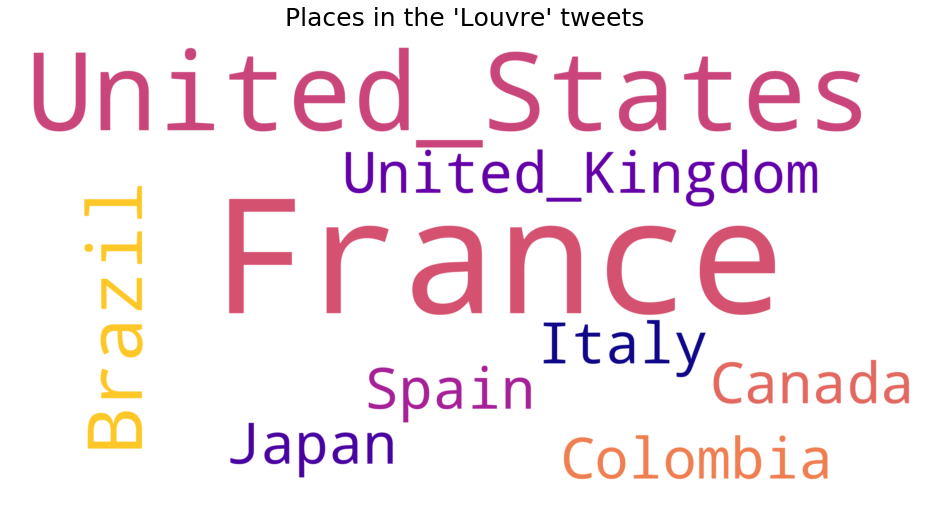

In [19]:
t=[]
for (i,j) in u:
    for k in range(j):
        if type(i)==str:
#         print(i.replace(" ","_").replace("-","_"))
            t.append(i.replace(" ","_").replace("-","_"))
ttd=' '.join(t)
wordcloud = WordCloud(collocations=False,background_color="white",colormap="plasma",width=4000,height=2000).generate(ttd)
fig = plt.figure(figsize=(13,13))
default_colors = wordcloud.to_array()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
ss="Places in the '%s' tweets" %search_term
plt.suptitle(ss,fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 1.4]) 
plt.show()

### 3. Graph of Co-Occurring Hashtags

In [20]:
heds=[]
for i in range(len(df)):
    iterable=df.iloc[i]['hashtags_list']
    if type(iterable)!=float:
        if len(iterable)>1:
            for j in itertools.combinations(iterable, 2):
                heds.append((j[0],j[1],df.iloc[i]['date']))
print("Number of hashtag-co-occurrences:")
print("%i multiple (%i unique)" %(len(heds),len(set(heds))))

Number of hashtag-co-occurrences:
3495 multiple (3494 unique)


In [21]:
G=nx.MultiGraph()
for k,v in dict(Counter(heds)).items():
    G.add_edge(k[0],k[1],date=k[2])
    
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

print("The graph of co-occurrent hashtags of the '%s' tweets is a weighted graph and it has %i nodes and %i edges \n" %(search_term,len(Gw.nodes()),len(Gw.edges())))
if nx.is_connected(Gw)==True:
    print ("This graph is a connected graph")
else:
    print ("This graph is a disconnected graph and it has",nx.number_connected_components(Gw),"connected components" )   
    giant = max(connected_component_subgraphs(Gw), key=len)
    Gwlcc=Gw.subgraph(giant)
    print ("The largest connected component of this graph has %i nodes and %i edges" %(len(Gwlcc.nodes()),len(Gwlcc.edges())))

The graph of co-occurrent hashtags of the 'Louvre' tweets is a weighted graph and it has 320 nodes and 1631 edges 

This graph is a disconnected graph and it has 33 connected components
The largest connected component of this graph has 219 nodes and 1494 edges


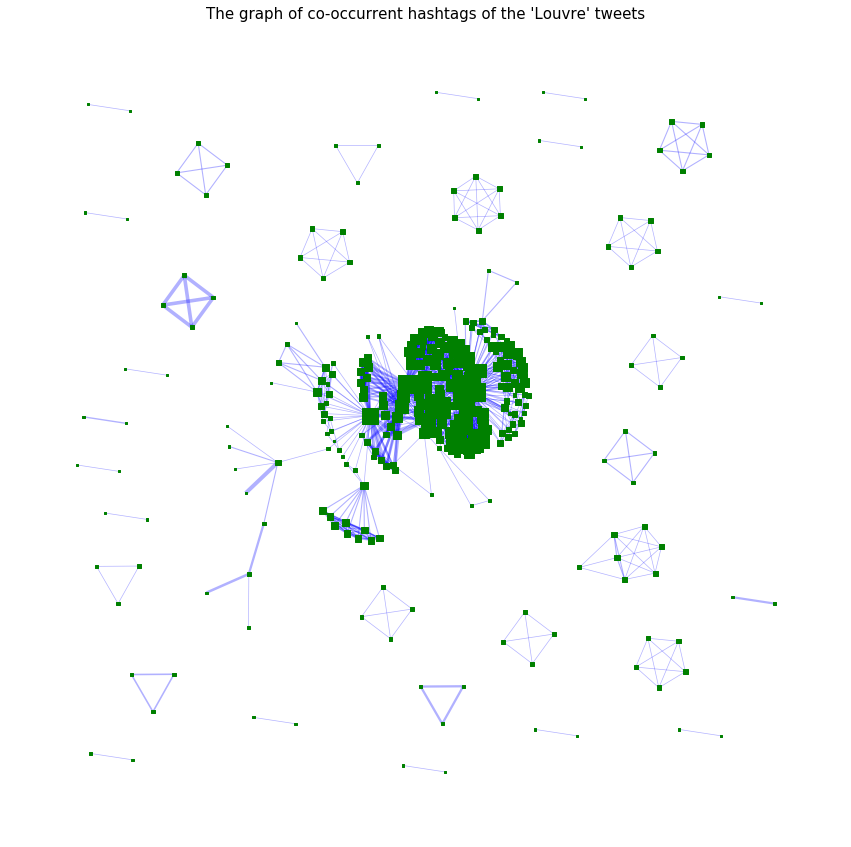

In [22]:
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
# cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
# edge_color=weight_list
# vmin = min(edge_color) 
# vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[5*Gw.degree(n) for n in Gw.nodes()]

figsize=(15,15)

pos=graphviz_layout(Gw)

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color='g',node_shape="s",node_size=nsi)
nx.draw_networkx_edges(Gw, pos, edge_color='b',width=edge_width,alpha=0.3) #edge_cmap=cmap,vmin=vmin, vmax=vmax,
nol={}
for n in Gw.nodes():
    nol[n]=""
nx.draw_networkx_labels(Gw, pos,labels=nol)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(Gw, yoffset,font_size=12);
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm.set_array([])
# cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
# cbar.set_label('Average sentiment of sentences')
sst="The graph of co-occurrent hashtags of the '%s' tweets" %search_term
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

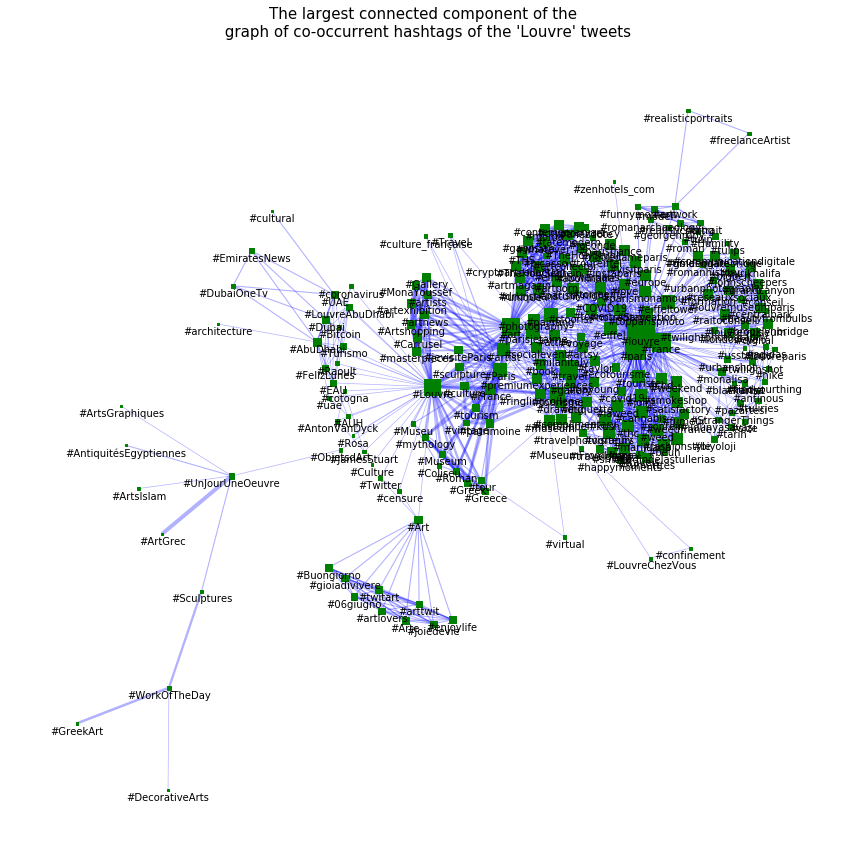

In [23]:
edge_width=[Gwlcc[u][v]['weight'] for u,v in Gwlcc.edges()]
edge_width=[math.log(1+w) for w in edge_width]
# cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gwlcc.edges(data=True) ]
# edge_color=weight_list
# vmin = min(edge_color) 
# vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[5*Gwlcc.degree(n) for n in Gwlcc.nodes()]

figsize=(15,15)

pos=graphviz_layout(Gwlcc)

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gwlcc, pos, node_color='g',node_shape="s",node_size=nsi)
nx.draw_networkx_edges(Gwlcc, pos, edge_color='b',width=edge_width,alpha=0.3) #edge_cmap=cmap,vmin=vmin, vmax=vmax,
plt.axis('off');
yoffset = {}
y_off = -7 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gwlcc, yoffset,font_size=10);
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm.set_array([])
# cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
# cbar.set_label('Average sentiment of sentences')
sst="The largest connected component of the \n graph of co-occurrent hashtags of the '%s' tweets" %search_term
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [24]:


# plt.figure(figsize=figsize);
# nodes = nx.draw_networkx_nodes(Gwlcc, pos, node_color='g',node_shape="s",node_size=nsi)
# nx.draw_networkx_edges(Gwlcc, pos, edge_color='b',width=edge_width,alpha=0.3) #edge_cmap=cmap,vmin=vmin, vmax=vmax,
# plt.axis('off');
# yoffset = {}
# y_off = -7 # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(Gwlcc, yoffset,font_size=10);
# # sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # sm.set_array([])
# # cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
# # cbar.set_label('Average sentiment of sentences')
# sst="The largest connected component of the \n graph of co-occurrent hashtags of the '%s' tweets" %search_term
# plt.title(sst,fontsize=15);
# plt.margins(x=0.1, y=0.1) 

### 4. Graph of Mention-ing/-ed Tweeple

In [25]:
meds=[]
for i in range(len(df)):
    iterable=df.iloc[i]['mentions_list']
    if type(iterable)!=float:
        for k in iterable:
            meds.append((df.iloc[i]['sender'],k,df.iloc[i]['date']))
print("Number of mentions among tweeple:")
print("%i multiple (%i unique)" %(len(meds),len(set(meds))))

Number of mentions among tweeple:
1981 multiple (1978 unique)


In [26]:
mG=nx.MultiDiGraph()
for k,v in dict(Counter(meds)).items():
    mG.add_edge(k[0],k[1],date=k[2])
    
weight={(x,y):v for (x, y), v in Counter(mG.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
mGw = nx.DiGraph()
mGw.add_weighted_edges_from(w_edges)

print("The graph of mention-ing/-ed tweeple of the '%s' tweets is a weighted digraph and it has %i nodes and %i edges \n" %(search_term,len(mGw.nodes()),len(mGw.edges())))
if nx.is_weakly_connected(mGw)==True:
    print ("This graph is a weakly connected graph")
else:
    print ("This graph is a weakly disconnected graph and it has",nx.number_weakly_connected_components(mGw),"weakly connected components" )   
    giant = max(weakly_connected_component_subgraphs(mGw), key=len)
    mGwlcc=mGw.subgraph(giant)
    print ("The largest weakly connected component of this graph has %i nodes and %i edges" %(len(mGwlcc.nodes()),len(mGwlcc.edges())))

The graph of mention-ing/-ed tweeple of the 'Louvre' tweets is a weighted digraph and it has 2089 nodes and 1864 edges 

This graph is a weakly disconnected graph and it has 472 weakly connected components
The largest weakly connected component of this graph has 319 nodes and 397 edges


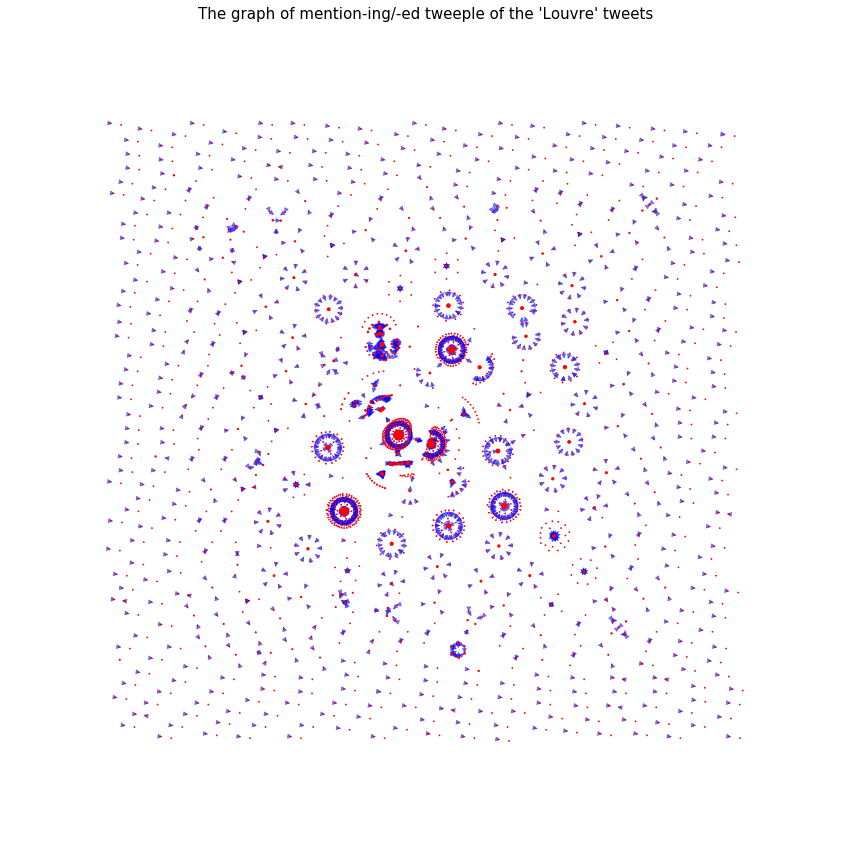

In [27]:
edge_width=[mGw[u][v]['weight'] for u,v in mGw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
# cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in mGw.edges(data=True) ]
# edge_color=weight_list
# vmin = min(edge_color) 
# vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[0.6*mGw.degree(n) for n in mGw.nodes()]

figsize=(15,15)

pos=graphviz_layout(mGw)

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(mGw, pos, node_color='r',node_size=nsi)
nx.draw_networkx_edges(mGw, pos, edge_color='b',width=edge_width,alpha=0.5) #edge_cmap=cmap,vmin=vmin, vmax=vmax,
nol={}
for n in mGw.nodes():
    nol[n]=""
nx.draw_networkx_labels(mGw, pos,labels=nol)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(Gw, yoffset,font_size=12);
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm.set_array([])
# cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
# cbar.set_label('Average sentiment of sentences')
sst="The graph of mention-ing/-ed tweeple of the '%s' tweets" %search_term
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

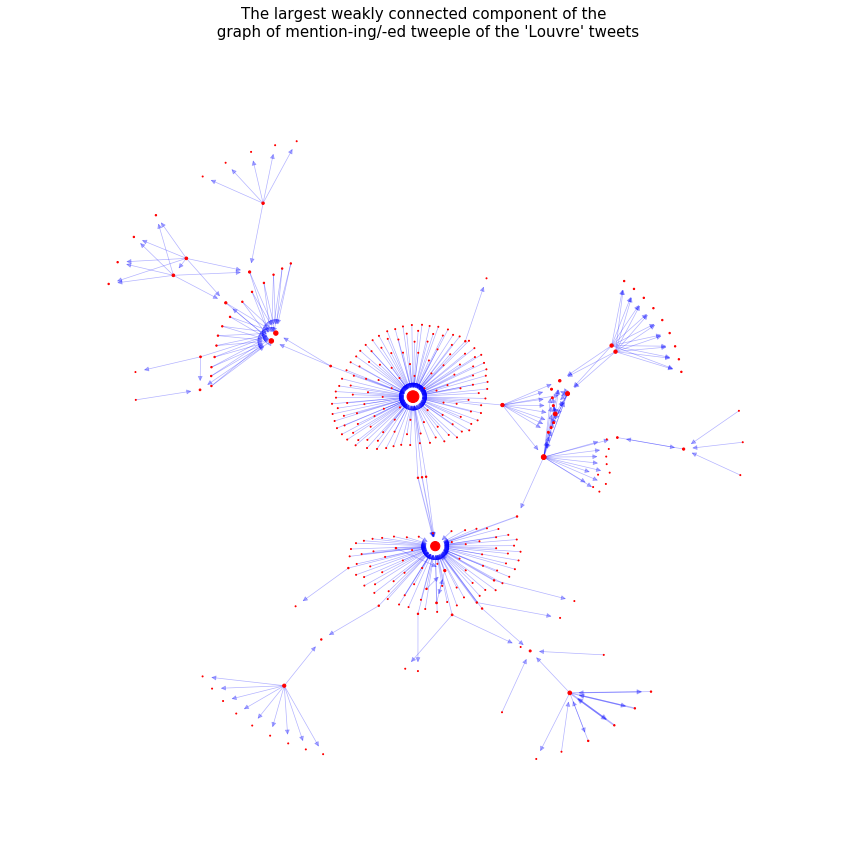

In [28]:
edge_width=[mGwlcc[u][v]['weight'] for u,v in mGwlcc.edges()]
edge_width=[math.log(1+w) for w in edge_width]
# cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in mGwlcc.edges(data=True) ]
# edge_color=weight_list
# vmin = min(edge_color) 
# vmax = max(edge_color) 
width_list=[0.5*math.log(1+w) for w in weight_list]
# width_list=[0.5*math.log(abs(min(weight_list))+w) for w in weight_list] #weight_list
nsi=[mGwlcc.degree(n) for n in mGwlcc.nodes()]

figsize=(15,15)

pos=graphviz_layout(mGwlcc)

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(mGwlcc, pos, node_color='r',node_size=nsi)
nx.draw_networkx_edges(mGwlcc, pos, edge_color='b',width=edge_width,alpha=0.3) #edge_cmap=cmap,vmin=vmin, vmax=vmax,
nol={}
for n in mGwlcc.nodes():
    nol[n]=""
nx.draw_networkx_labels(mGwlcc, pos,labels=nol)
plt.axis('off');
yoffset = {}
y_off = -7 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(mGwlcc, yoffset,font_size=10);
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm.set_array([])
# cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
# cbar.set_label('Average sentiment of sentences')
sst="The largest weakly connected component of the \n graph of mention-ing/-ed tweeple of the '%s' tweets" %search_term
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

### A Random Sample of the Graph of Mention-ing/-ed Tweeple

In [30]:
sample_size=100
sample_nodes=random.sample(mGwlcc.nodes(),sample_size)
RG=mGwlcc.subgraph(sample_nodes)

weight={(x,y):v for (x, y), v in Counter(RG.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
RGw = nx.DiGraph()
RGw.add_edges_from(w_edges)

print("The random sample subgraph of mention-ing/-ed tweeple of the '%s' tweets is a weighted digraph and it has %i nodes and %i edges \n" %(search_term,len(RGw.nodes()),len(RGw.edges())))
if nx.is_weakly_connected(RGw)==True:
    print ("This graph is a weakly connected graph")
else:
    print ("This graph is a weakly disconnected graph and it has",nx.number_weakly_connected_components(RGw),"weakly connected components" )   
    giant = max(weakly_connected_component_subgraphs(RGw), key=len)
    RGwlcc=RGw.subgraph(giant)
    print ("The largest weakly connected component of this graph has %i nodes and %i edges" %(len(RGwlcc.nodes()),len(RGwlcc.edges())))

The random sample subgraph of mention-ing/-ed tweeple of the 'Louvre' tweets is a weighted digraph and it has 52 nodes and 51 edges 

This graph is a weakly disconnected graph and it has 2 weakly connected components
The largest weakly connected component of this graph has 48 nodes and 47 edges


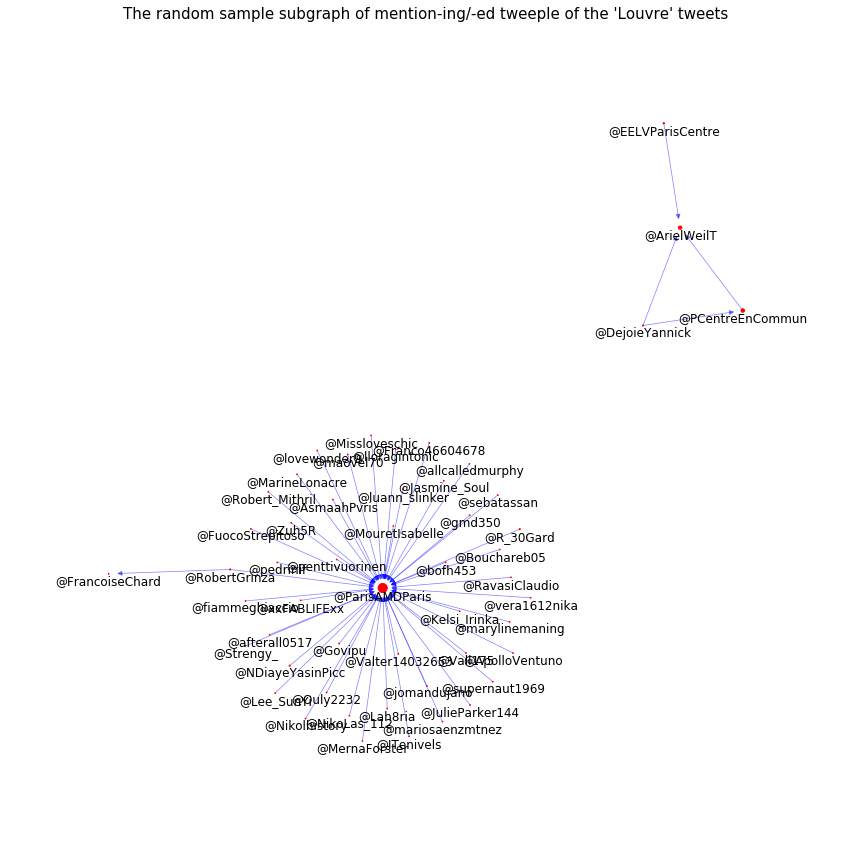

In [31]:
edge_width=[RGw[u][v]['weight'] for u,v in RGw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
# cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in RGw.edges(data=True) ]
# edge_color=weight_list
# vmin = min(edge_color) 
# vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[0.6*mGw.degree(n) for n in RGw.nodes()]

figsize=(15,15)

pos=graphviz_layout(RGw)

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(RGw, pos, node_color='r',node_size=nsi)
nx.draw_networkx_edges(RGw, pos, edge_color='b',width=edge_width,alpha=0.5) #edge_cmap=cmap,vmin=vmin, vmax=vmax,
# nol={}
# for n in RGw.nodes():
#     nol[n]=""
# nx.draw_networkx_labels(RGw, pos,labels=nol)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(RGw, yoffset,font_size=12);
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm.set_array([])
# cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
# cbar.set_label('Average sentiment of sentences')
sst="The random sample subgraph of mention-ing/-ed tweeple of the '%s' tweets" %search_term
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 